# Predicting House Prices: Regression


In [ ]:
import turicreate as turi
# Using housing data from King County, Seattle WA
sales = turi.SFrame('home_data.sframe')  # 21,613 rows of 21 columns

In [ ]:
sales.column_names()

In [ ]:
sales.head()

Remember every Turi data structure has a `show()` method.
In particular we want a scatter plot.

In [37]:
turi.plot(sales[1:5000]['sqft_living'], sales[1:5000]['price'], xlabel="square feet", ylabel="house price")
# we subset to maximum 5k rows, otherwise it plots a heatmap.

Materializing X axis SArray

Materializing Y axis SArray

## Splitting the data

Now we know what the data looks like, more or less.

We would like to now create a simple regression model using `sqft_living`. 

In [38]:
train_data, test_data = sales.random_split(.8, seed=0)  
# split the data into two with given distribution. 80% for training and 20% for testing.

### Build the regression model

In [39]:
sqft_model = turi.linear_regression.create(train_data, target="price", features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.014381     | 4365187.964436     | 2729576.061106       | 261858.417387                   | 282850.822596                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Evaluate the Square Feet Model

In [ ]:
print(test_data['price'].mean())

In [ ]:
print(sqft_model.evaluate(test_data)) 
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

## Show the resulting model fit

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline   
# to plot on the notebook itself

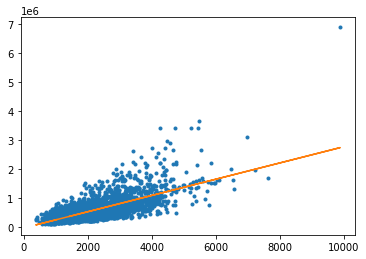

In [41]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
        test_data['sqft_living'], sqft_model.predict(test_data),'-')
# plot the true test data prices with points.
# then plot our model's predicted price line for comparison

## Inspect the optimal coefficients of our model

In [42]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-43021.872776044765,5043.338608607057
sqft_living,None,280.3181666672086,2.219447914550279


## Create a model with more features

A model with more features will not always produce a more accurate result than another with less features. Quality of features also matters.

However, we can certainly improve upon our square feet model by incorporating other influential predictor variables.

Zipcode area for example matters a lot for the price. Let's examine the average house price for each of the neighborhoods by zipcode area.

In [ ]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
sales[my_features].show()

In [44]:
# zipcode column is a String (categorical variable).
# thus when we plot it it defaults to a box-and-whisker plot.
turi.plot(sales['zipcode'], sales['price'])
# this plot will demostrate that zipcode does have an impact on price.

Materializing X axis SArray

Materializing Y axis SArray

In [ ]:
complex_model = turi.linear_regression.create(train_data, target='price', features=my_features,
                                             validation_set=None)

In [ ]:
print(sqft_model.evaluate(test_data))
print(complex_model.evaluate(test_data))
# let's compare the performance of the two given the test data.

### Predict the Price of a specific House

In [ ]:
# now let us use the models to predict the price of 3 houses.
house1 = sales[sales['id'] == '5309101200']
house1

In [ ]:
print(house1['price'])

print(sqft_model.predict(house1))  
print(complex_model.predict(house1))
# model is programmed to predict the price as target

### Prediction for House2

In [ ]:
house2 = sales[sales['id'] == '1925069082']
house2

In [ ]:
print(house2['price'])
print(sqft_model.predict(house2))
print(complex_model.predict(house2))

### A third house, extremely expensive

In [ ]:
bill_gates_house = {
    'bedrooms': [8],
    'bathrooms': [25],
    'sqft_living': [50000],
    'sqft_lot': [225000],
    'floors': [4],
    'zipcode': ['98039'],
    'condition': [10],
    'grade': [10],
    'waterfront': [1],
    'view': [4],
    'sqft_above': [37500],
    'sqft_basement': [12500],
    'yr_built': [1994],
    'yr_renovated': [2010],
    'lat': [47.627606],
    'long': [-122.242054],
    'sqft_living15': [5000],
    'sqft_lot15': [40000]
} 

In [43]:
house3 = turi.SFrame(bill_gates_house)
print(complex_model.predict(house3))

[15016529.988226019]
